In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [6]:
madhan = pd.read_csv(r"C:\Users\Home\Desktop\MonthWiseMarketArrivals_Clean.csv")

In [7]:
madhan.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [8]:
madhan.shape

(10227, 10)

In [9]:
madhan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [10]:
pd.unique(madhan['market'])

array(['ABOHAR(PB)', 'AGRA(UP)', 'AHMEDABAD(GUJ)', 'AHMEDNAGAR(MS)',
       'AJMER(RAJ)', 'ALIGARH(UP)', 'ALWAR(RAJ)', 'AMRITSAR(PB)',
       'BALLIA(UP)', 'BANGALORE', 'BAREILLY(UP)', 'BELGAUM(KNT)',
       'BHATINDA(PB)', 'BHAVNAGAR(GUJ)', 'BHOPAL', 'BHUBNESWER(OR)',
       'BIHARSHARIF(BHR)', 'BIJAPUR(KNT)', 'BIKANER(RAJ)', 'BOMBORI(MS)',
       'BURDWAN(WB)', 'CHAKAN(MS)', 'CHALLAKERE(KNT)', 'CHANDIGARH',
       'CHANDVAD(MS)', 'CHENNAI', 'CHICKBALLAPUR(KNT)',
       'COIMBATORE(TN) (bellary)', 'COIMBATORE(TN) (podisu)',
       'DEESA(GUJ)', 'DEHRADOON(UTT)', 'DELHI', 'DEORIA(UP)',
       'DEVALA(MS)', 'DEWAS(MP)', 'DHAVANGERE(KNT)', 'DHULIA(MS)',
       'DINDIGUL(TN)', 'DINDIGUL(TN)(Podis', 'DINDORI(MS)', 'ETAWAH(UP)',
       'GONDAL(GUJ)', 'GORAKHPUR(UP)', 'GUWAHATI', 'HALDWANI(UTT)',
       'HASSAN(KNT)', 'HOSHIARPUR(PB)', 'HUBLI(KNT)', 'HYDERABAD',
       'INDORE(MP)', 'JAIPUR', 'JALANDHAR(PB)', 'JALGAON(MS)',
       'JALGAON(WHITE)', 'JAMMU', 'JAMNAGAR(GUJ)', 'JODHPUR(RAJ)',
 

In [11]:
madhan.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [12]:
madhan.drop(['state','city','date'], axis = 1)

,market,month,year,quantity,priceMin,priceMax,priceMod
0,ABOHAR(PB),January,2005,2350,404,493,446
1,ABOHAR(PB),January,2006,900,487,638,563
2,ABOHAR(PB),January,2010,790,1283,1592,1460
3,ABOHAR(PB),January,2011,245,3067,3750,3433
4,ABOHAR(PB),January,2012,1035,523,686,605
...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526
10223,YEOLA(MS),December,2012,207066,485,1327,1136
10224,YEOLA(MS),December,2013,215883,472,1427,1177
10225,YEOLA(MS),December,2014,201077,446,1654,1456


In [13]:
len(madhan)

10227

In [18]:
madhan.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014
10226,YEOLA(MS),December,2015,223315,609,1446,1126,MS,YEOLA,December-2015


In [19]:
madhan.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [20]:
madhan.iloc[:,2:7] = madhan.iloc[:,2:7].astype(int)

In [21]:
madhan.dtypes

market      object
month       object
year         int32
quantity     int32
priceMin     int32
priceMax     int32
priceMod     int32
state       object
city        object
date        object
dtype: object

In [22]:
madhan.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


# Extracting the states from market names# 

In [23]:
madhan.market.value_counts().head()

LASALGAON(MS)     242
PIMPALGAON(MS)    224
MANMAD(MS)        218
LONAND(MS)        211
MAHUVA(GUJ)       210
Name: market, dtype: int64

In [32]:
madhan['state'] = madhan.market.str.split('(').str[-1]

In [33]:
madhan.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB),ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB),ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB),ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB),ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB),ABOHAR,January-2012


In [34]:
madhan['state'] = madhan.state.str.split(')').str[0]

In [35]:
madhan.state.unique()

array(['PB', 'UP', 'GUJ', 'MS', 'RAJ', 'BANGALORE', 'KNT', 'BHOPAL', 'OR',
       'BHR', 'WB', 'CHANDIGARH', 'CHENNAI', 'bellary', 'podisu', 'UTT',
       'DELHI', 'MP', 'TN', 'Podis', 'GUWAHATI', 'HYDERABAD', 'JAIPUR',
       'WHITE', 'JAMMU', 'HR', 'KOLKATA', 'AP', 'LUCKNOW', 'MUMBAI',
       'NAGPUR', 'KER', 'PATNA', 'CHGARH', 'JH', 'SHIMLA', 'SRINAGAR',
       'TRIVENDRUM'], dtype=object)

In [36]:
mkState = madhan.groupby(['state', 'market'], as_index=False).count()

In [37]:
mkState.market.unique()

array(['KURNOOL(AP)', 'RAJAHMUNDRY(AP)', 'BANGALORE', 'BHOPAL',
       'BIHARSHARIF(BHR)', 'CHANDIGARH', 'CHENNAI', 'RAIPUR(CHGARH)',
       'DELHI', 'AHMEDABAD(GUJ)', 'BHAVNAGAR(GUJ)', 'DEESA(GUJ)',
       'GONDAL(GUJ)', 'JAMNAGAR(GUJ)', 'MAHUVA(GUJ)', 'RAJKOT(GUJ)',
       'SURAT(GUJ)', 'GUWAHATI', 'KARNAL(HR)', 'HYDERABAD', 'JAIPUR',
       'JAMMU', 'RANCHI(JH)', 'PALAYAM(KER)', 'BELGAUM(KNT)',
       'BIJAPUR(KNT)', 'CHALLAKERE(KNT)', 'CHICKBALLAPUR(KNT)',
       'DHAVANGERE(KNT)', 'HASSAN(KNT)', 'HUBLI(KNT)', 'KOLAR(KNT)',
       'RAICHUR(KNT)', 'KOLKATA', 'LUCKNOW', 'DEWAS(MP)', 'INDORE(MP)',
       'MANDSOUR(MP)', 'NEEMUCH(MP)', 'SAGAR(MP)', 'UJJAIN(MP)',
       'AHMEDNAGAR(MS)', 'BOMBORI(MS)', 'CHAKAN(MS)', 'CHANDVAD(MS)',
       'DEVALA(MS)', 'DHULIA(MS)', 'DINDORI(MS)', 'JALGAON(MS)',
       'JUNNAR(MS)', 'KALVAN(MS)', 'KOLHAPUR(MS)', 'KOPERGAON(MS)',
       'LASALGAON(MS)', 'LONAND(MS)', 'MALEGAON(MS)', 'MANMAD(MS)',
       'NANDGAON(MS)', 'NASIK(MS)', 'NEWASA(MS)', 'NIPHAD(

In [38]:
state_now = ['PB', 'UP', 'GUJ', 'MS', 'RAJ', 'BANGALORE', 'KNT', 'BHOPAL', 'OR',
       'BHR', 'WB', 'CHANDIGARH', 'CHENNAI', 'bellary', 'podisu', 'UTT',
       'DELHI', 'MP', 'TN', 'Podis', 'GUWAHATI', 'HYDERABAD', 'JAIPUR',
       'WHITE', 'JAMMU', 'HR', 'KOLKATA', 'AP', 'LUCKNOW', 'MUMBAI',
       'NAGPUR', 'KER', 'PATNA', 'CHGARH', 'JH', 'SHIMLA', 'SRINAGAR',
       'TRIVENDRUM']
state_new =['PB', 'UP', 'GUJ', 'MS', 'RAJ', 'KNT', 'KNT', 'MP', 'OR',
       'BHR', 'WB', 'CH', 'TN', 'KNT', 'TN', 'UP',
       'DEL', 'MP', 'TN', 'TN', 'ASM', 'AP', 'RAJ',
       'MS', 'JK', 'HR', 'WB', 'AP', 'UP', 'MS',
       'MS', 'KER', 'BHR', 'HR', 'JH', 'HP', 'JK',
       'KEL']

In [39]:
madhan.state = madhan.state.replace(state_now, state_new)

In [40]:
madhan.state.unique()

array(['PB', 'UP', 'GUJ', 'MS', 'RAJ', 'KNT', 'MP', 'OR', 'BHR', 'WB',
       'CH', 'TN', 'DEL', 'ASM', 'AP', 'JK', 'HR', 'KER', 'JH', 'HP',
       'KEL'], dtype=object)

# Getting the Dates

In [41]:
madhan.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [42]:
madhan.index

RangeIndex(start=0, stop=10227, step=1)

In [44]:
pd.to_datetime('January 2001')

Timestamp('2001-01-01 00:00:00')

In [45]:
madhan.date = pd.DatetimeIndex(madhan.date)

In [46]:
madhan.shape

(10227, 10)

In [47]:
pd.unique(madhan.city)

array(['ABOHAR', 'AGRA', 'AHMEDABAD', 'AHMEDNAGAR', 'AJMER', 'ALIGARH',
       'ALWAR', 'AMRITSAR', 'BALLIA', 'BANGALORE', 'BAREILLY', 'BELGAUM',
       'BHATINDA', 'BHAVNAGAR', 'BHOPAL', 'BHUBNESWER', 'BIHARSHARIF',
       'BIJAPUR', 'BIKANER', 'BOMBORI', 'BURDWAN', 'CHAKAN', 'CHALLAKERE',
       'CHANDIGARH', 'CHANDVAD', 'CHENNAI', 'CHICKBALLAPUR', 'COIMBATORE',
       'DEESA', 'DEHRADOON', 'DELHI', 'DEORIA', 'DEVALA', 'DEWAS',
       'DHAVANGERE', 'DHULIA', 'DINDIGUL', 'DINDORI', 'ETAWAH', 'GONDAL',
       'GORAKHPUR', 'GUWAHATI', 'HALDWANI', 'HASSAN', 'HOSHIARPUR',
       'HUBLI', 'HYDERABAD', 'INDORE', 'JAIPUR', 'JALANDHAR', 'JALGAON',
       'JAMMU', 'JAMNAGAR', 'JODHPUR', 'JUNNAR', 'KALVAN', 'KANPUR',
       'KARNAL', 'KHANNA', 'KOLAR', 'KOLHAPUR', 'KOLKATA', 'KOPERGAON',
       'KOTA', 'KURNOOL', 'LASALGAON', 'LONAND', 'LUCKNOW', 'LUDHIANA',
       'MADURAI', 'MAHUVA', 'MALEGAON', 'MANDSOUR', 'MANMAD', 'MEERUT',
       'MIDNAPUR', 'MUMBAI', 'NAGPUR', 'NANDGAON', 'NASIK', 'NEEMU

In [49]:
madhan.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


# the  price different in onion prices in mumbai

In [50]:
mk_onion=madhan[madhan.city == "MUMBAI"]

In [51]:
mk_onion

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,2005-01-01
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,2006-01-01
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,2007-01-01
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,2008-01-01
...,...,...,...,...,...,...,...,...,...,...
6795,MUMBAI,December,2011,290350,519,994,749,MS,MUMBAI,2011-12-01
6796,MUMBAI,December,2012,218500,1048,1609,1330,MS,MUMBAI,2012-12-01
6797,MUMBAI,December,2013,226385,1298,1976,1639,MS,MUMBAI,2013-12-01
6798,MUMBAI,December,2014,294150,1433,2178,1802,MS,MUMBAI,2014-12-01


In [57]:
pd.set_option("precision", 0)
mk_onion.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146,146,146,146,146
mean,2010,221721,901,1317,1114
std,4,40793,731,1019,883
min,2004,131590,215,335,287
25%,2007,195125,434,648,544
50%,2010,222220,692,982,846
75%,2013,246050,1099,1623,1392
max,2016,413681,4005,5517,4714


In [58]:
mk_onion.index

Int64Index([6654, 6655, 6656, 6657, 6658, 6659, 6660, 6661, 6662, 6663,
            ...
            6790, 6791, 6792, 6793, 6794, 6795, 6796, 6797, 6798, 6799],
           dtype='int64', length=146)

In [59]:
mk_onion = mk_onion.sort_values(by="date")
mk_onion.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
6667,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI,2004-02-01
6680,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI,2004-03-01
6692,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI,2004-04-01
6704,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI,2004-05-01


# Visualization of Prices 

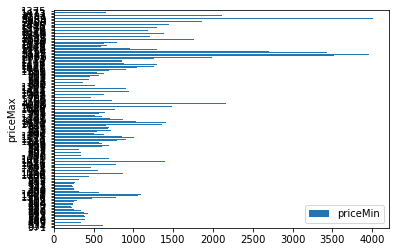

In [62]:
mk_onion.plot(kind="barh", x = 'priceMax', y = 'priceMin')
plt.show()

In [63]:
mk_onion["monthVal"] = pd.DatetimeIndex(mk_onion["date"]).month
mk_onion.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,monthVal
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01,1
6667,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI,2004-02-01,2
6680,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI,2004-03-01,3
6692,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI,2004-04-01,4
6704,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI,2004-05-01,5


In [64]:
mk_onion["priceDiff"] = mk_onion["priceMax"] - mk_onion["priceMin"]
mk_onion.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,monthVal,priceDiff
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01,1,252
6667,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI,2004-02-01,2,220
6680,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI,2004-03-01,3,121
6692,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI,2004-04-01,4,129
6704,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI,2004-05-01,5,109


In [69]:
mkPivot = pd.pivot_table(mk_onion,columns = "year", index = "monthVal")
mkPivot

priceDiff                                                   ...  \
year          2004 2005 2006 2007 2008  2009  2010  2011 2012  2013  ...   
monthVal                                                             ...   
1              252  252  173  270  202   506   998  1804  241   414  ...   
2              220  222  133  278  157   423   671   524  214   391  ...   
3              121  175  121  179  154   258   228   312  158   308  ...   
4              129  181  103  194  126   140   198   239  196   260  ...   
5              109  168  101  197  142   100   187   213  209   312  ...   
6              134  255  187  227  204   170   264   340  252   450  ...   
7              129  265  195  242  221   140   225   339  260   406  ...   
8              139  313  212  226  269   156   321   409  267   568  ...   
9              139  373  215  221  267   204   391   416  340  1175  ...   
10             218  464  265  424  267   277   376   439  420  2078  ...   
11             306  579  361  391  423   764  1442   475  533  1458  ...   
12             240  233  301  186  481  1436  2046   475  561   678  ...   

         quantity                                                          \
year         2007    2008    2009    2010    2011    2012    2013    2014   
monthVal                                                                    
1          205200  267550  229000  247150  262073  262950  251980  246955   
2          192950  207700  201000  233570  246050  233440  214200  243615   
3          221800  229215  220000  254840  289200  224000  235650  248000   
4          235600  218050  250480  289600  179000  222640  204200  238351   
5          176300  246050  205200  225200  219600  226300  203700  223570   
6          219550  176350  221390  251000  204104  210050  193050  215048   
7          205440  199655  249700  232350  202230  235900  188854  183051   
8          181550  180400  227150  220150  188000  180350  133340  176890   
9          144700  180600  228700  229350  231170  209150  131590  199940   
10         176530  170950  236550  252070  231370  188300  164560  159050   
11         167515  211150  231450  248000  265000  202750  172877  240700   
12         259925  238150  259850  237725  290350  218500  226385  294150   

                          
year        2015    2016  
monthVal                  
1         288460  413681  
2         207400  187100  
3         256720     NaN  
4         243100     NaN  
5         246650     NaN  
6         239210     NaN  
7         204000     NaN  
8         207837     NaN  
9         183270     NaN  
10        284078     NaN  
11        308071     NaN  
12        302409     NaN  

[12 rows x 65 columns]

<AxesSubplot:xlabel='monthVal'>

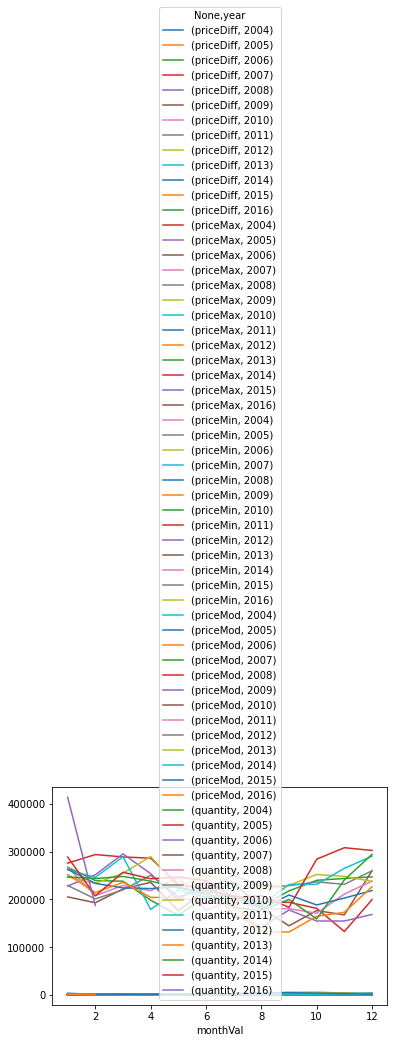

In [70]:
mkPivot.plot()

<AxesSubplot:ylabel='Frequency'>

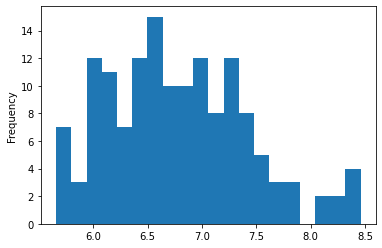

In [72]:
mk_onion["log_priceMod"] = np.log(mk_onion.priceMod)
mk_onion.log_priceMod.plot(kind="hist", bins=20)

# Onion price in Mumbai

In [74]:
mk_onion =madhan.loc[madhan.city == "MUMBAI"].copy()
mk_onion.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,2005-01-01
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,2006-01-01
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,2007-01-01
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,2008-01-01


In [75]:
mk_onion=mk_onion.drop(["market","month","year","priceMin","priceMax","state","city"], axis=1)
mk_onion.head()

,quantity,priceMod,date
6654,267100,849,2004-01-01
6655,275845,387,2005-01-01
6656,228000,402,2006-01-01
6657,205200,997,2007-01-01
6658,267550,448,2008-01-01


<AxesSubplot:>

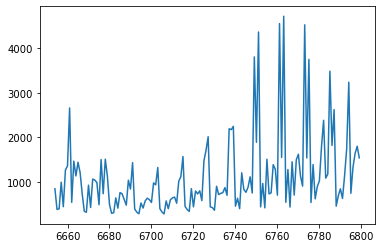

In [76]:
mk_onion.priceMod.plot()

<AxesSubplot:ylabel='Frequency'>

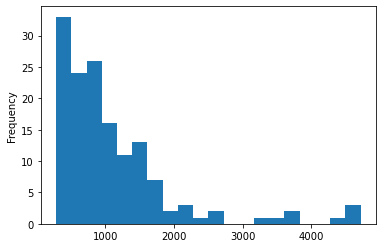

In [79]:
mk_onion.priceMod.plot(kind="hist", bins=20)

<AxesSubplot:ylabel='Frequency'>

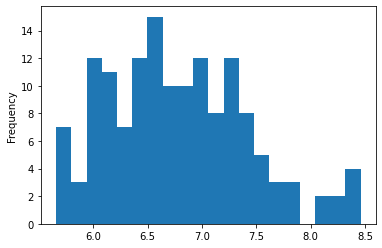

In [80]:
mk_onion["log_priceMod"] = np.log(mk_onion.priceMod)
mk_onion.log_priceMod.plot(kind="hist", bins=20)

# Time Series Model 

In [81]:
mk_onion_mean = mk_onion.log_priceMod.mean()
mk_onion["mean_price"] = np.exp(mk_onion_mean)
mk_onion.head()

,quantity,priceMod,date,log_priceMod,mean_price
6654,267100,849,2004-01-01,7,889
6655,275845,387,2005-01-01,6,889
6656,228000,402,2006-01-01,6,889
6657,205200,997,2007-01-01,7,889
6658,267550,448,2008-01-01,6,889


<AxesSubplot:xlabel='date'>

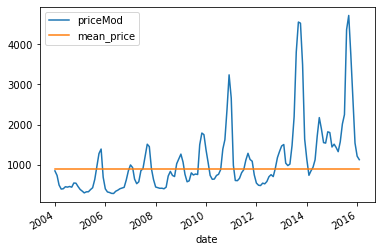

In [82]:
mk_onion.plot(kind="line", x="date", y=["priceMod", "mean_price"])

# Using RMSE model

In [84]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [85]:
mean_modelRMSE = RMSE(mk_onion.priceMod, mk_onion.mean_price)
mean_modelRMSE

908.4772843986449

In [87]:
Result_df = pd.DataFrame(columns =["Model","Forcast","RMSE"])
Result_df.loc[0,"Model"] = "Mean Model"
Result_df.loc[0,"Forcast"] = np.exp(mk_onion_mean)
Result_df.loc[0,"RMSE"] = mean_modelRMSE
Result_df

,Model,Forcast,RMSE
0,Mean Model,889,908


# Linear Trend Model

In [89]:
mk_onion["timeindex"] = mk_onion.date - mk_onion.date.min()
mk_onion.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
6654,267100,849,2004-01-01,7,889,0 days
6655,275845,387,2005-01-01,6,889,366 days
6656,228000,402,2006-01-01,6,889,731 days
6657,205200,997,2007-01-01,7,889,1096 days
6658,267550,448,2008-01-01,6,889,1461 days


In [90]:
mk_onion["timeindex"] = mk_onion["timeindex"]/np.timedelta64(1,"M")
mk_onion.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
6654,267100,849,2004-01-01,7,889,0
6655,275845,387,2005-01-01,6,889,12
6656,228000,402,2006-01-01,6,889,24
6657,205200,997,2007-01-01,7,889,36
6658,267550,448,2008-01-01,6,889,48


In [91]:
linear_model = smf.ols('log_priceMod ~ timeindex', data = mk_onion).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_priceMod   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     129.3
Date:                Sun, 22 May 2022   Prob (F-statistic):           8.75e-22
Time:                        21:03:01   Log-Likelihood:                -96.105
No. Observations:                 146   AIC:                             196.2
Df Residuals:                     144   BIC:                             202.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0284      0.077     77.799      0.000       5.875       6.182
timeindex      0.0105      0.001     11.372      0.000       0.009       0.012
==============================================================================
Omnibus:                        7.655   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.052
Skew:                           0.566   Prob(JB):                       0.0178
Kurtosis:                       2.792   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
linear_model_pred = linear_model.predict()
linear_model_pred

array([6.0283932 , 6.15476395, 6.28078943, 6.4068149 , 6.53284038,
       6.65921113, 6.7852366 , 6.91126208, 7.03728755, 7.1636583 ,
       7.28968378, 7.41570925, 7.54173473, 6.03909673, 6.16546748,
       6.29149296, 6.41751843, 6.54354391, 6.66991466, 6.79594013,
       6.92196561, 7.04799108, 7.17436183, 7.30038731, 7.42641278,
       7.55243826, 6.04910972, 6.17513519, 6.30116067, 6.42718614,
       6.55355689, 6.67958237, 6.80560784, 6.93163332, 7.05800407,
       7.18402954, 7.31005502, 7.43608049, 6.05981325, 6.18583873,
       6.3118642 , 6.43788968, 6.56426043, 6.6902859 , 6.81631138,
       6.94233685, 7.0687076 , 7.19473308, 7.32075855, 7.44678403,
       6.07017151, 6.19619698, 6.32222246, 6.44824793, 6.57461868,
       6.70064416, 6.82666963, 6.95269511, 7.07906586, 7.20509133,
       7.33111681, 7.45714228, 6.08087504, 6.20690052, 6.33292599,
       6.45895147, 6.58532222, 6.71134769, 6.83737317, 6.96339864,
       7.08976939, 7.21579487, 7.34182034, 7.46784582, 6.09123

In [93]:
model_linear_forecast_manual = 0.0093 * 146 + 6.1121
model_linear_forecast_manual

7.4699

In [94]:
mk_onion["linear_price"] = np.exp(linear_model_pred)
mk_onion.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price
6654,267100,849,2004-01-01,7,889,0,415
6655,275845,387,2005-01-01,6,889,12,471
6656,228000,402,2006-01-01,6,889,24,534
6657,205200,997,2007-01-01,7,889,36,606
6658,267550,448,2008-01-01,6,889,48,687


# Evaluating Using RMSE model

In [95]:
linear_model_RMSE = RMSE(mk_onion.priceMod, mk_onion.linear_price)
linear_model_RMSE

724.6662938231528

In [96]:
Result_df.loc[1,"Model"] = "Linear Model"
Result_df.loc[1,"Forcast"] = np.exp(model_linear_forecast_manual)
Result_df.loc[1,"RMSE"] = linear_model_RMSE
Result_df

,Model,Forcast,RMSE
0,Mean Model,889,908
1,Linear Model,1754,725


In [97]:
linear_model_quant = smf.ols('log_priceMod ~ timeindex + np.log(quantity)', data = mk_onion).fit()
linear_model_quant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_priceMod   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     77.18
Date:                Sun, 22 May 2022   Prob (F-statistic):           1.84e-23
Time:                        21:06:44   Log-Likelihood:                -89.443
No. Observations:                 146   AIC:                             184.9
Df Residuals:                     143   BIC:                             193.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           15.2957      2.508      6.098      0.000      10.338      20.254
timeindex            0.0109      0.001     12.218      0.000       0.009       0.013
np.log(quantity)    -0.7562      0.205     -3.696      0.000      -1.161      -0.352
==============================================================================
Omnibus:                        4.782   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                4.875
Skew:                           0.429   Prob(JB):                       0.0874
Kurtosis:                       2.743   Cond. No.                     5.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='timeindex'>

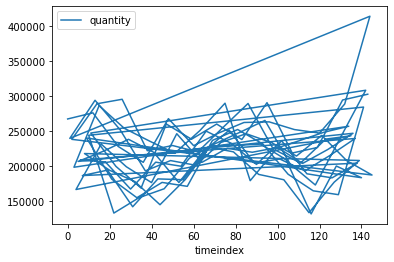

In [99]:
mk_onion["linear_price_quant"] = np.exp(linear_model_quant.predict())
mk_onion.plot(kind = "line", x="timeindex", y = "quantity")

# Random Model

In [100]:
mk_onion["shift_log_priceMod"] = mk_onion.log_priceMod.shift()
mk_onion.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod
6654,267100,849,2004-01-01,7,889,0,415,346,NaN
6655,275845,387,2005-01-01,6,889,12,471,385,7
6656,228000,402,2006-01-01,6,889,24,534,507,6
6657,205200,997,2007-01-01,7,889,36,606,625,6
6658,267550,448,2008-01-01,6,889,48,687,583,7


<AxesSubplot:>

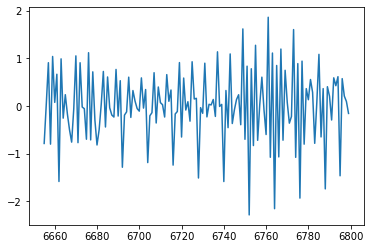

In [101]:
mk_onion["log_priceMod_diff"] = mk_onion.log_priceMod - mk_onion.shift_log_priceMod
mk_onion.log_priceMod_diff.plot()

In [102]:
mk_onion["random_price"] = np.exp(mk_onion.shift_log_priceMod)
mk_onion.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod,log_priceMod_diff,random_price
6654,267100,849,2004-01-01,7,889,0,415,346,NaN,NaN,NaN
6655,275845,387,2005-01-01,6,889,12,471,385,7,-8e-01,849
6656,228000,402,2006-01-01,6,889,24,534,507,6,4e-02,387
6657,205200,997,2007-01-01,7,889,36,606,625,6,9e-01,402
6658,267550,448,2008-01-01,6,889,48,687,583,7,-8e-01,997


# Evaluating  RMSE model

In [104]:
random_model_RMSE = RMSE(mk_onion.priceMod, mk_onion.random_price)
random_model_RMSE

1132.4887241579172

<AxesSubplot:>

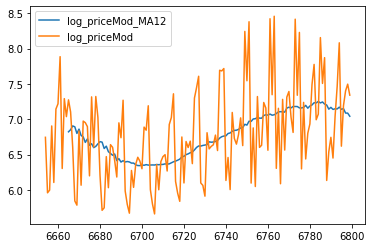

In [105]:
mk_onion["log_priceMod_MA12"] = mk_onion.log_priceMod.rolling(12).mean()
mk_onion.plot(kind="line", y=["log_priceMod_MA12", "log_priceMod"])

In [106]:
mk_onion["MA12_price"] = np.exp(mk_onion.log_priceMod_MA12)
mk_onion.sample(5)

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod,log_priceMod_diff,random_price,log_priceMod_MA12,MA12_price
6735,202230,876,2011-07-01,7,889,90,1068,1139,7,1e-01,764,7,800
6739,204000,2248,2015-07-01,8,889,138,1769,1909,8,3e-02,2174,7,864
6795,290350,749,2011-12-01,7,889,95,1126,915,8,-1e+00,3237,7,1262
6702,238351,939,2014-04-01,7,889,123,1511,1441,7,-4e-02,981,6,577
6712,226300,527,2012-05-01,6,889,100,1187,1167,6,-2e-01,664,6,581


In [107]:
MA_model_forcast = mk_onion.log_priceMod_MA12.tail(12).mean()

# MA12 Model

In [108]:
MA12_model_RMSE = RMSE(mk_onion.priceMod, mk_onion.MA12_price)
MA12_model_RMSE

841.8072265328709

In [109]:
Result_df.loc[3,"Model"] = "Moving Average 12"
Result_df.loc[3,"Forcast"] = np.exp(MA_model_forcast)
Result_df.loc[3,"RMSE"] = MA12_model_RMSE
Result_df.head()

,Model,Forcast,RMSE
0,Mean Model,889,908
1,Linear Model,1754,725
3,Moving Average 12,1255,842


In [110]:
def adf(ts):
    
    rolmean = ts.rolling(window=12).mean()
    rolstd = ts.rolling(window=12).std()

    
    ts.plot(color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    adftest = adfuller(ts, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags Used',
                                              'Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    return adfoutput

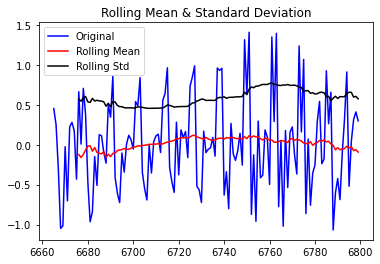

Test Statistic                -2e+00
p-value                        3e-01
# of Lags Used                 1e+01
Number of Observations Used    1e+02
Critical Value (1%)           -3e+00
Critical Value (5%)           -3e+00
Critical Value (10%)          -3e+00
dtype: float64

In [111]:
ts = mk_onion.log_priceMod - mk_onion.log_priceMod_MA12
ts.dropna(inplace= True)
adf(ts)

#  Decomposition

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose

mk_onion.index = pd.to_datetime(mk_onion.date)
mk_onion.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod,log_priceMod_diff,random_price,log_priceMod_MA12,MA12_price
date,,,,,,,,,,,,,
2004-01-01,267100,849,2004-01-01,7,889,0,415,346,NaN,NaN,NaN,NaN,NaN
2005-01-01,275845,387,2005-01-01,6,889,12,471,385,7,-8e-01,849,NaN,NaN
2006-01-01,228000,402,2006-01-01,6,889,24,534,507,6,4e-02,387,NaN,NaN
2007-01-01,205200,997,2007-01-01,7,889,36,606,625,6,9e-01,402,NaN,NaN
2008-01-01,267550,448,2008-01-01,6,889,48,687,583,7,-8e-01,997,NaN,NaN


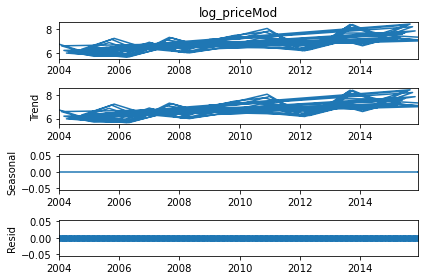

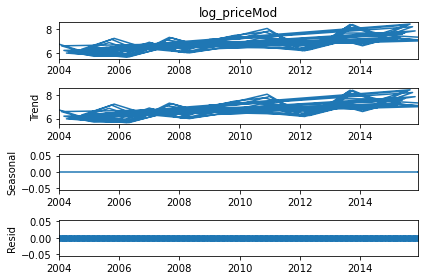

In [113]:
decomposition = seasonal_decompose(mk_onion.log_priceMod, model = "additive",period = 1)
decomposition.plot()

In [114]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# ARIMA Model

In [115]:
ts = mk_onion.log_priceMod
ts_diff = mk_onion.log_priceMod_diff
ts_diff.dropna(inplace = True)

In [116]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_acf

C:\Users\Home\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        , -0.54612312,  0.35974009, -0.48269918,  0.31064144,
       -0.28581108,  0.25488628, -0.17927192,  0.20121241, -0.38328221,
        0.23712336, -0.33378314,  0.65536578, -0.26709031,  0.18329631,
       -0.31617105,  0.16054614, -0.14311553,  0.12853298, -0.08896203,
        0.17512094])

<AxesSubplot:ylabel='Frequency'>

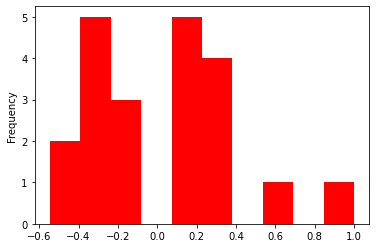

In [117]:
ACF = pd.Series(lag_acf)
ACF.plot(kind="hist", color="red")

<AxesSubplot:ylabel='Frequency'>

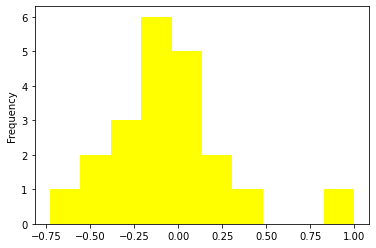

In [118]:
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
PACF = pd.Series(lag_pacf)
PACF.plot(kind="bar", color="yellow")

# Exponential Smoothing

<AxesSubplot:xlabel='date'>

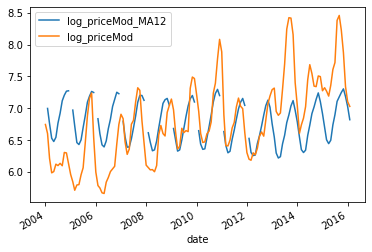

In [121]:
mk_onion["log_priceMod_MA12"] = mk_onion.log_priceMod.rolling(10).mean()
mk_onion.plot(kind="line", y=["log_priceMod_MA12", "log_priceMod"])